In [489]:
import pandas as pd

delitos = pd.read_csv("/Users/eduardogonzalez/Desktop/Pandas Kaggle/denuncias-victimas-pgj.csv",
                      encoding = "ISO-8859-1")
#pd.set_option("display.max_rows", 10)

print("Setup complete.")


from sklearn.decomposition import PCA
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
print("Setup Complete")
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

Setup complete.
Setup Complete


/Users/eduardogonzalez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Vista previa de los datos



In [490]:
delitos.head(20)

,idCarpeta,Delito,Categoria,FechaHecho,Anohecho,Mes_hecho,Sexo,Edad,TipoPersona,CalidadJuridica,lon,lat,geopoint,ClasificacionDelito,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,8511197,AMENAZAS,DELITO DE BAJO IMPACTO,31/08/19 20:15,2019,Agosto,Masculino,38,FISICA,VICTIMA Y DENUNCIANTE,-99.07223798,19.41027256,19.410273,-99.07223798,FUERO COMUN,NaN,NaN
1,8511198,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHíCULO CON Y SIN VIOLENCIA,31/08/19 21:00,2019,Agosto,Masculino,57,FISICA,VICTIMA Y DENUNCIANTE,-99.172779,19.2411539,19.241154,-99.172779,FUERO COMUN,NaN,NaN
2,8511199,DAíïO EN PROPIEDAD AJENA INTENCIONAL,DELITO DE BAJO IMPACTO,31/08/19 20:30,2019,Agosto,Femenino,34,FISICA,VICTIMA Y DENUNCIANTE,-99.2063041,19.2269421,19.226942,-99.2063041,FUERO COMUN,NaN,NaN
3,8511200,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,03/07/19 19:30,2019,Julio,Masculino,NaN,FISICA,VICTIMA Y DENUNCIANTE,-99.22957015,19.28505361,19.285054,-99.22957015,FUERO COMUN,NaN,NaN
4,8511208,DISCRIMINACION,DELITO DE BAJO IMPACTO,01/06/19 0:00,2019,Junio,Femenino,37,FISICA,VICTIMA Y DENUNCIANTE,-99.1015259,19.29423682,19.294237,-99.1015259,FUERO COMUN,NaN,NaN
5,8511211,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,31/08/19 12:15,2019,Agosto,Masculino,31,FISICA,VICTIMA Y DENUNCIANTE,-99.1602847,19.2716191,19.271619,-99.1602847,FUERO COMUN,NaN,NaN
6,8511214,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,31/08/19 23:00,2019,Agosto,Femenino,28,FISICA,VICTIMA,-99.09695907,19.44555483,19.445555,-99.09695907,FUERO COMUN,NaN,NaN
7,8511215,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,31/08/19 22:30,2019,Agosto,Femenino,28,FISICA,VICTIMA Y DENUNCIANTE,-99.1450598,19.4505419,19.450542,-99.1450598,FUERO COMUN,NaN,NaN
8,8511218,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHíCULO CON Y SIN VIOLENCIA,31/08/19 19:30,2019,Agosto,Masculino,41,FISICA,VICTIMA Y DENUNCIANTE,-99.12074782,19.30676954,19.306770,-99.12074782,FUERO COMUN,NaN,NaN
9,8511242,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,DELITO DE BAJO IMPACTO,01/09/19 1:30,2019,Septiembre,Masculino,47,FISICA,VICTIMA Y DENUNCIANTE,-99.13925672,19.49029261,19.490293,-99.13925672,FUERO COMUN,NaN,NaN


In [491]:
#delitos.rename(rename_axis("id", axis='columns')
list(delitos.columns) 

['idCarpeta',
 'Delito',
 'Categoria',
 'FechaHecho',
 'Anohecho',
 'Mes_hecho',
 'Sexo',
 'Edad',
 'TipoPersona',
 'CalidadJuridica',
 'lon',
 'lat',
 'geopoint',
 'ClasificacionDelito',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16']

# Limpiando Datos (Borrando columnas)

In [492]:
delitoslimpio=delitos
delitoslimpio['Edad'] = delitoslimpio.Edad.fillna(30)
delitoslimpio['TipoPersona'] = delitoslimpio.TipoPersona.fillna('No Especifica')
delitoslimpio['Sexo'] = delitoslimpio.Sexo.fillna('No Especifica')
delitoslimpio['lon'] = delitoslimpio.lon.fillna('No Especifica')
delitoslimpio['lat'] = delitoslimpio.lat.fillna('No Especifica')
delitoslimpio['Mes_hecho'] = delitoslimpio.lat.fillna('No Especifica')
delitoslimpio= delitoslimpio.drop("idCarpeta",axis=1)
delitoslimpio= delitoslimpio.drop("ClasificacionDelito",axis=1)
delitoslimpio= delitoslimpio.drop("Unnamed: 14",axis=1)
delitoslimpio= delitoslimpio.drop("Unnamed: 15",axis=1)
delitoslimpio= delitoslimpio.drop("Unnamed: 16",axis=1)
#delitoslimpio= delitoslimpio.drop("Anohecho",axis=1)
delitoslimpio= delitoslimpio.drop("geopoint",axis=1)

#delitoslimpio= delitoslimpio.drop("Mes_hecho",axis=1)





In [493]:
list(delitoslimpio.columns) 

['Delito',
 'Categoria',
 'FechaHecho',
 'Anohecho',
 'Mes_hecho',
 'Sexo',
 'Edad',
 'TipoPersona',
 'CalidadJuridica',
 'lon',
 'lat']

# Limpiando Datos (Reemplazando titulos delitos)

#### Renombramos datos para sintetizar y agrupar.

In [494]:
dict = {"ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA": "ROBOVEHICULO",
       "DAíïO EN PROPIEDAD AJENA INTENCIONAL":"DANOPROPIEDAD",
        "VIOLENCIA FAMILIAR": "VIOLENCIAFAM",
       "LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION":"CHOQUE",
       "ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA":"ROBOVEHICULO",
       "ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA":"ROBOVEHICULO",
       "ROBO A CASA HABITACION SIN VIOLENCIA":"ROBOCASA",
       "PERDIDA DE LA VIDA POR PARO CARDIACO":"FALLECIOENFERMO",
       "DESAPARICION FORZADA DE PERSONAS":"SECUESTRO",
       "ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA":"ASALTO",
       "ROBO DE VEHICULO DE SERVICIO Pí_BLICO CON VIOLENCIA":"ROBOVEHICULO",
       "ROBO DE ACCESORIO DE AUTO":"ROBOVEHICULO",
        "LESIONES INTENCIONALES POR ARMA DE FUEGO":"LESIONINTENCIONALGRAVE",
       "LESIONES INTENCIONALES POR GOLPES":"LESIONINTENCIONALBAJA",
       "HOMICIDIO POR GOLPES":"HOMICIDIO",
       "ROBO A NEGOCIO SIN VIOLENCIA":"DANOPROPIEDAD",
       "FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO":"FRAUDE",
       "USURPACIíñN DE IDENTIDAD":"FRAUDE",
       "PERDIDA DE LA VIDA POR OTRAS CAUSAS":"PERDIDAVIDA",
       "TENTATIVA DE FRAUDE":"FRAUDE",
       "ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO":"ROBOVEHICULO",
       "NARCOMENUDEO POSESION SIMPLE":"VENTADROGAS",
       "LESIONES INTENCIONALES":"LESIONINTENCIONALBAJA",
       "NARCOMENUDEO POSESIíñN CON FINES DE VENTA":"VENTADROGAS",
       "VIOLACION EQUIPARADA":"VIOLACION",
       "ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA":"ASALTO",
       "PORTACION ARMA/PROHIB.":"PORTACIONARMAS",
       "ROBO A PASAJERO A BORDO DE TRANSPORTE Pí_BLICO CON VIOLENCIA":"ASALTO",
       "ROBO DE PLACA DE AUTOMOVIL":"ASALTO",
       "USO DE DOCUMENTO FALSO":"FRAUDE",
       "ABUSO DE AUTORIDAD":"ABUSOAUTORIDAD",
       "SUSTRACCION DE MENORES":"SECUESTRO",
       "ROBO DE VEHICULO DE PEDALES":"ROBOVEHICULO",
       "DAíïO EN PROPIEDAD AJENA CULPOSA POR TRí\x81NSITO VEHICULAR A AUTOMOVIL":"ROBOVEHICULO",
       "LESIONES CULPOSAS POR TRANSITO VEHICULAR":"CHOQUE",
       "DESPOJO":"ASALTO", "ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA":"ASALTO",
       "ROBO DE VEHICULO DE SERVICIO Pí_BLICO SIN VIOLENCIA":"ROBOVEHICULO",
       "LESIONES INTENCIONALES POR ARMA BLANCA":"LESIONINTENCIONALALTA",
       "ROBO DE ALHAJAS":"ASALTO",
       "ROBO DE OBJETOS A ESCUELA":"DANOPROPIEDAD",
       "ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA":"DANOPROPIEDAD",
       "ROBO DE DOCUMENTOS":"ASALTO",
       "ROBO DE DINERO":"ASALTO",
       "TENTATIVA DE EXTORSION":"EXTORSION",
       "ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA":"DANOPROPIEDAD",
       "DAíïO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL":"ROBOVEHICULO",
       "FALSIFICACION DE DOCUMENTOS":"FRAUDE",
       "DDH SIN DATOS":"FRAUDE",
       "DAíïO EN PROPIEDAD AJENA CULPOSA":"DANOPROPIEDAD",
       "DAíïO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION":"DANOPROPIEDAD",
       "ROBO DE MOTOCICLETA CON VIOLENCIA":"ROBOVEHICULO",
       "TENTATIVA DE HOMICIDIO":"LESIONINTENCIONALALTA",
        "PRIVACION DE LA LIBERTAD PERSONAL":"ASALTO",
        "QUEBRANTAMIENTO DE SELLOS":"FRAUDE",
        "MALTRATO ANIMAL":"MALTRATOANIMAL",
        "ACOSO SEXUAL":"ACOSOSEXUAL",
        "TORTURA":"SECUESTRO",
        "LESIONES CULPOSAS":"LESIONINTENCIONALBAJA",
        "ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA":"ASALTO",
        "ALLANAMIENTO DE MORADA":"DANOPROPIEDAD",
        "ROBO A REPARTIDOR CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA":"ASALTO",
        "ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA":"ASALTO",
        "FALSEDAD DE DECLARACIONES":"FRAUDE",
        "CORRUPCION DE MENORES":"CORRUPCIONMENORES",
        "PERSONAS EXTRAVIADAS":"SECUESTRO",
        "POSESION DE VEHICULO ROBADO":"ROBOVEHICULO",
        "ROBO DE ANIMALES":"DANOPROPIEDAD",
        "ROBO A PASAJERO A BORDO DE TRANSPORTE Pí_BLICO SIN VIOLENCIA":"ASALTO",
        "ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA":"ASALTO",
        "ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA":"ASALTO",
        "ROBO A REPARTIDOR SIN VIOLENCIA":"ASALTO",
        "DAíïO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES":"DANOPROPIEDAD",
        "HOMICIDIO CULPOSO POR TRí\x81NSITO VEHICULAR (CAIDA)":"HOMICIDIO",
        "HOMICIDIO POR ARMA BLANCA":"HOMICIDIO",
        "TENTATIVA DE ROBO":"LESIONINTENCIONALBAJA",
        "ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA":"ASALTO",
        "DISPAROS DE ARMA DE FUEGO":"LESIONINTENCIONALALTA",
        "ROBO A OFICINA Pí_BLICA SIN VIOLENCIA":"DANOPROPIEDAD",
        "SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIíñN)":"SECUESTRO",
        "HOMICIDIO CULPOSO POR TRí\x81NSITO VEHICULAR (ATROPELLADO)":"HOMICIDIO",
        "ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA":"ASALTO",
        "TRATA DE PERSONAS":"TRATAPERSONAS",
        "ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA":"ASALTO",
        "USURPACION DE PROFESION":"FRAUDE",
        "ATAQUE A LAS VIAS GENERALES DE COMUNICACIíñN":"FRAUDE",
        "LESIONES CULPOSAS POR QUEMADURAS":"LESIONINTENCIONALALTA",
        "OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA":"LESIONINTENCIONALALTA",
        "ATAQUE A LAS VIAS DE COMUNICACION (DAíïO A VIAS O MEDIOS DE TRANSPORTE)":"FRAUDE",
        "TENTATIVA DE VIOLACION":"LESIONINTENCIONALALTA",
        "LESIONES CULPOSAS ACCIDENTE LABORAL":"LESIONINTENCIONALBAJA",
        "ROBO A PASAJERO EN RTP SIN VIOLENCIA":"ASALTO",
        "FEMINICIDIO":"HOMICIDIO",
        "CONTRA FUNCIONARIOS PUBLICOS":"ABUSOAUTORIDAD",
        "ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA":"ASALTO",
        "VIOLACION EQUIPARADA POR CONOCIDO":"VIOLACION",
        "ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA":"ASALTO",
        "DAíïO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION":"DANOPROPIEDAD",
        "ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO EN ECOBUS CON VIOLENCIA":"ASALTO",
        "ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON VIOLENCIA":"DANOPROPIEDAD",
        "TENTATIVA DE ROBO DE VEHICULO":"DANOPROPIEDAD",
        "ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA":"DANOPROPIEDAD",
        "ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA":"DANOPROPIEDAD",
        "ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA":"ROBOVEHICULO",
        "ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA":"ASALTO",
        "ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA":"ASALTO",
        "ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA":"ROBOVEHICULO",
        "ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA":"DANOPROPIEDAD",
        "HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)":"HOMICIDIO",
        "INTIMIDACION":"LESIONINTENCIONALBAJA",
        "ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA":"ROBOVEHICULO",
        "LESIONES INTENCIONALES Y ROBO DE VEHICULO":"ROBOVEHICULO",
        "ROBO A PASAJERO EN AUTOBí_S FORí\x81NEO CON VIOLENCIA":"ASALTO",
        "EXPLOTACIíñN DE MENOR O DISCAPACITADO":"CORRUPCIONMENORES",
        "ROBO DE MAQUINARIA CON VIOLENCIA":"ASALTO",
        "ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA":"ASALTO",
        "HOMICIDIO CULPOSO POR ARMA DE FUEGO":"HOMICIDIO",
        "ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA":"ASALTO",
        "ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA":"ROBOVEHICULO",
        "ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA":"ASALTO",
        "ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA":"ROBOVEHICULO",
        "ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA":"ASALTO",
        "HOMICIDIO CULPOSO POR TRí\x81NSITO VEHICULAR":"HOMICIDIO",
        "ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA":"ASALTO",
        "DAíïO EN PROPIEDAD AJENA CULPOSA POR TRí\x81NSITO VEHICULAR A VIAS DE COMUNICACION":"DANOPROPIEDAD",
        "ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA":"DANOPROPIEDAD",
        "USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS":"FRAUDE",
        "HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)":"HOMICIDIO",
        "ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA":"ASALTO",
        "ROBO DE MAQUINARIA SIN VIOLENCIA":"DANOPROPIEDAD",
        "TRAFICO DE INFLUENCIA":"FRAUDE",
        "INTIMIDACION (EVITAR DENUNCIA":"LESIONINTENCIONALBAJA",
        "ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA":"DANOPROPIEDAD",
        "VIOLACION EQUIPARADA Y ROBO DE VEHICULO":"VIOLACION",
        "ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA":"ASALTO",
        "HOMICIDIO CULPOSO":"HOMICIDIO",
        "ROBO A OFICINA Pí_BLICA CON VIOLENCIA":"DANOPROPIEDAD",
        "HOMICIDIO POR AHORCAMIENTO":"HOMICIDIO",
        "VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO":"VIOLACION",
        "PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)":"VIOLACION",
        "ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA":"ASALTO",
        "ASOCIACION DELICTUOSA":"FRAUDE","ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA":"ASALTO",
        "VIOLACION TUMULTUARIA EQUIPARADA":"VIOLACION",
        "ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA":"ASALTO",
        "ROBO A SUCURSAL BANCARIA (SUPERMERCADO) SIN VIOLENCIA":"DANOPROPIEDAD",
       "ENRIQUECIMIENTO ILICITO":"ENRIQUECIMIENTOILICITO",
       "DAíïO EN PROPIEDAD AJENA CULPOSA POR TRí\x81NSITO VEHICULAR A BIENES INMUEBLES":"DANOPROPIEDAD",
       "PORNOGRAFIA INFANTIL":"CORRUPCIONMENORES","DELITOS DE ABOGADOS PATRONOS Y LITIGANTES":"FRAUDES",
       "ABUSO SEXUAL":"VIOLACION","LESIONES CULPOSAS POR CAIDA":"LESIONESINTENCIONALBAJA",
       "FALSIFICACION DE SELLOS":"FRAUDE",
       "ROBO DE ARMA":"ASALTO",
       "ESTUPRO":"VIOLACION",
       "ROBO A NEGOCIO CON VIOLENCIA":"DANOPROPIEDAD",
       "ROBO DE MOTOCICLETA SIN VIOLENCIA":"ROBOVEHICULO",
       "HOMICIDIO CULPOSO POR TRí\x81NSITO VEHICULAR (COLISION)":"HOMICIDIO",
       "ROBO A CASA HABITACION CON VIOLENCIA":"DANOPROPIEDAD",
       "ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA":"ASALTO",
       "ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA":"ASALTO",
       "PORTACION DE ARMA DE FUEGO":"PORTACIONARMAS",
        "HOMICIDIOS INTENCIONALES (OTROS)":"HOMICIDIO",
        "HOMICIDIO POR ARMA DE FUEGO":"HOMICIDIO",
        "DAíïO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO":"DANOPROPIEDAD",
        "PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO":"SECUESTRO",
        "ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA":"DANOPROPIEDAD",
        "ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA":"ASALTO",
        "PLAGIO O SECUESTRO":"SECUESTRO",
        "VIOLACION TUMULTUARIA":"VIOLACION",
        "ROBO A PASAJERO EN RTP CON VIOLENCIA":"ASALTO",
        "ROBO DE OBJETOS":"ASALTO",
        "ROBO DE ACCESORIOS DE AUTO":"ROBOVEHICULO"
        
       }
delitoslimpio = delitoslimpio.replace({"Delito": dict})



#BORRAR EXISTENTES
#ENCUBRIMIENTO, DDH FRVT,COHECHO,RESPONSABILIDAD PROFESIONAL,INHUMACIONES Y/O EXHUMACIONES,GESTIíñN AMBIENTAL,
#EXHORTOS,PERDIDA DE LA VIDA POR DERRUMBE, LA ADMINISTRACION DE JUSTICIA,VARIACION DE NOMBRE O DOMICILIO,
#NEGACION DEL SERVICIO PUBLICO,DDH OTRAS MATERIAS,PERDIDA DE LA VIDA POR CAIDA,DELITOS AMBIENTALES,
#REVELACION DE SECRETOS,INSOLVENCIA ALIMENTARIA,RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA),
#COBRANZA ILEGITIMA, PERDIDA DE LA VIDA POR SUICIDIO, PERDIDA DE LA VIDA POR ENFERMEDAD
#EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO,TENTATIVA DE SUICIDIO,PERDIDA DE LA VIDA POR ASFIXIA
#USO INDEBIDO DE ATRIBUCIONES Y FACULTADES,PERDIDA DE LA VIDA POR QUEMADURA,DESOBEDENCIA DE PARTICULARES
#PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA,DENUNCIA DE HECHOS,PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS
#ROBO DE FLUIDOS,PERDIDA DE LA VIDA POR ACCIDENTE LABORAL,REGULACIíñN URBANA,DELITOS ELECTORALES
#VIOLACION DE CORRESPONDENCIA,DAíïO SUELO (ACTIVIDAD', 'USURPACION DE FUNCIONES,PERDIDA DE LA VIDA POR PRECIPITACION,
#PERDIDA DE LA VIDA POR INTOXICACION, PECULADO,DDH ANONIMAS,DDH CERESO,DDH FDS,DDH INCOMPETENCIA,ULTRAJES
#CONTRA EL ESTADO CIVIL,ENRIQUECIMIENTO ILICITO,PELIGRO DE CONTAGIO,CAMBIO DE USO DE SUELO,SABOTAJE,
#BIGAMIA,OPOSICION A LA OBRA PUBLICA,CALUMNIAS,OTROS DELITOS,TALA,EVASION DE PRESOS,CONTAMINACIíñN O RESIDUOS
#DIFAMACION,


delitoslimpio=delitoslimpio.query("Delito != 'ENCUBRIMIENTO'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH FRVT'")
delitoslimpio=delitoslimpio.query("Delito != 'COHECHO'")
delitoslimpio=delitoslimpio.query("Delito != 'RESPONSABILIDAD PROFESIONAL'")
delitoslimpio=delitoslimpio.query("Delito != 'INHUMACIONES Y/O EXHUMACIONES'")
delitoslimpio=delitoslimpio.query("Delito != 'GESTIíñN AMBIENTAL'")
delitoslimpio=delitoslimpio.query("Delito != 'EXHORTOS'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR DERRUMBE'")
delitoslimpio=delitoslimpio.query("Delito != 'LA ADMINISTRACION DE JUSTICIA'")
delitoslimpio=delitoslimpio.query("Delito != 'VARIACION DE NOMBRE O DOMICILIO'")
delitoslimpio=delitoslimpio.query("Delito != 'NEGACION DEL SERVICIO PUBLICO'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH OTRAS MATERIAS'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR CAIDA'")
delitoslimpio=delitoslimpio.query("Delito != 'DELITOS AMBIENTALES'")
delitoslimpio=delitoslimpio.query("Delito != 'REVELACION DE SECRETOS'")
delitoslimpio=delitoslimpio.query("Delito != 'INSOLVENCIA ALIMENTARIA'")
delitoslimpio=delitoslimpio.query("Delito != 'RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA)'")
delitoslimpio=delitoslimpio.query("Delito != 'COBRANZA ILEGITIMA'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR SUICIDIO'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR ENFERMEDAD'")
delitoslimpio=delitoslimpio.query("Delito != 'EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO'")
delitoslimpio=delitoslimpio.query("Delito != 'TENTATIVA DE SUICIDIO'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR ASFIXIA'")
delitoslimpio=delitoslimpio.query("Delito != 'USO INDEBIDO DE ATRIBUCIONES Y FACULTADES'")
delitoslimpio=delitoslimpio.query("Delito != 'DESOBEDENCIA DE PARTICULARES'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA'")
delitoslimpio=delitoslimpio.query("Delito != 'DENUNCIA DE HECHOS'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS'")
delitoslimpio=delitoslimpio.query("Delito != 'ROBO DE FLUIDOS'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR ACCIDENTE LABORAL'")
delitoslimpio=delitoslimpio.query("Delito != 'REGULACIíñN URBANA'")
delitoslimpio=delitoslimpio.query("Delito != 'DELITOS ELECTORALES'")
delitoslimpio=delitoslimpio.query("Delito != 'VIOLACION DE CORRESPONDENCIA'")
delitoslimpio=delitoslimpio.query("Delito != 'DAíïO SUELO (ACTIVIDAD'")
delitoslimpio=delitoslimpio.query("Delito != 'USURPACION DE FUNCIONES'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR PRECIPITACION'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR INTOXICACION'")
delitoslimpio=delitoslimpio.query("Delito != 'PECULADO'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH ANONIMAS'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH CERESO'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH FDS'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH INCOMPETENCIA'")
delitoslimpio=delitoslimpio.query("Delito != 'ULTRAJES'")
delitoslimpio=delitoslimpio.query("Delito != 'CONTRA EL ESTADO CIVIL'")
delitoslimpio=delitoslimpio.query("Delito != 'PELIGRO DE CONTAGIO'")
delitoslimpio=delitoslimpio.query("Delito != 'SABOTAJE'")
delitoslimpio=delitoslimpio.query("Delito != 'OPOSICION A LA OBRA PUBLICA'")
delitoslimpio=delitoslimpio.query("Delito != 'CALUMNIAS'")
delitoslimpio=delitoslimpio.query("Delito != 'TALA'")
delitoslimpio=delitoslimpio.query("Delito != 'EVASION DE PRESOS'")
delitoslimpio=delitoslimpio.query("Delito != 'CONTAMINACIíñN O RESIDUOS'")
delitoslimpio=delitoslimpio.query("Delito != 'DIFAMACION'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH RELACIONADAS'")
delitoslimpio=delitoslimpio.query("Delito != 'ABANDONO DE PERSONA'")
delitoslimpio=delitoslimpio.query("Delito != 'ABUSO DE CONFIANZA'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR QUEMADURA'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH REDES'")
delitoslimpio=delitoslimpio.query("Delito != 'PERDIDA DE LA VIDA POR AHOGAMIENTO'")
delitoslimpio=delitoslimpio.query("Delito != 'DELITOS CONTRA LA SALUD'")
delitoslimpio=delitoslimpio.query("Delito != 'DDH OFICIO COLABORACION'")
delitoslimpio=delitoslimpio.query("Delito != 'ABORTO'")
delitoslimpio=delitoslimpio.query("Delito != 'CAMBIO DE USO DE SUELO'")
delitoslimpio=delitoslimpio.query("Delito != 'LESIONES CULPOSAS POR CAIDA DE VEHí\x8dCULO EN MOVIMIENTO'")









delitoslimpio.Delito.unique()

array(['AMENAZAS', 'ROBOVEHICULO', 'DANOPROPIEDAD', 'ASALTO',
       'DISCRIMINACION', 'VIOLENCIAFAM', 'CHOQUE', 'ROBOCASA',
       'FALLECIOENFERMO', 'SECUESTRO', 'LESIONINTENCIONALGRAVE',
       'LESIONINTENCIONALBAJA', 'LESIONESINTENCIONALBAJA', 'HOMICIDIO',
       'FRAUDE', 'PERDIDAVIDA', 'VENTADROGAS', 'VIOLACION',
       'PORTACIONARMAS', 'ABUSOAUTORIDAD', 'LESIONINTENCIONALALTA',
       'EXTORSION', 'MALTRATOANIMAL', 'ACOSOSEXUAL', 'CORRUPCIONMENORES',
       'FRAUDES', 'TRATAPERSONAS', 'ENRIQUECIMIENTOILICITO', 'BIGAMIA',
       'OTROS DELITOS'], dtype=object)

# Limpieza datos Sexo

### Se le borraron datos erroneos

In [495]:
delitoslimpio=delitoslimpio.query("Sexo != '2019'")
delitoslimpio=delitoslimpio.query("Sexo != 'Enero'")
delitoslimpio=delitoslimpio.query("Sexo != 'Febrero'")
delitoslimpio=delitoslimpio.query("Sexo != 'Marzo'")
delitoslimpio=delitoslimpio.query("Sexo != 'Abril'")
delitoslimpio=delitoslimpio.query("Sexo != 'Mayo'")
delitoslimpio=delitoslimpio.query("Sexo != 'Junio'")
delitoslimpio=delitoslimpio.query("Sexo != 'Julio'")
delitoslimpio=delitoslimpio.query("Sexo != 'Agosto'")
delitoslimpio=delitoslimpio.query("Sexo != 'Septiembre'")
delitoslimpio=delitoslimpio.query("Sexo != 'Octubre'")
delitoslimpio=delitoslimpio.query("Sexo != 'No se especifica'")






In [496]:
delitoslimpio.Sexo.unique()
#delitoslimpio.head(20)

array(['Masculino', 'Femenino', 'No Especifica'], dtype=object)

# Limpieza datos categoria

In [497]:
dict = {"DELITO DE BAJO IMPACTO": "DELITOBAJO", "ROBO DE VEHí\x8dCULO CON Y SIN VIOLENCIA": "DELITOMEDIO",
       "ROBO A TRANSEUNTE EN Ví\x8dA Pí_BLICA CON Y SIN VIOLENCIA": "DELITOBAJO",
        "LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO": "DELITOALTO", 
       "HOMICIDIO DOLOSO": "DELITOALTO", "HECHO NO DELICTIVO": "DELITOBAJO",
       "VIOLACIíñN": "DELITOALTO", "ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA": "DELITOBAJO",
       "ROBO A NEGOCIO CON VIOLENCIA":"DELITOMEDIO",
       "ROBO A CASA HABITACIíñN CON VIOLENCIA":"DELITOMEDIO",
       "ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA":"DELITOBAJO",
       "ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA":"DELITOMEDIO",
       "ROBO A REPARTIDOR CON Y SIN VIOLENCIA":"DELITOBAJO",
       "COMERCIO Y SUMINISTRO":"DELIOTOBAJO",
       "ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA":"DELITOMEDIO",
       "ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA":"DELITOMEDIO",
       "SECUESTRO":"DELITOALTO"}
delitoslimpio = delitoslimpio.replace({"Categoria": dict})

In [498]:
delitoslimpio.Categoria.unique()

array(['DELITOBAJO', 'DELITOMEDIO', 'DELITOALTO',
       ' COMERCIO Y SUMINISTRO'], dtype=object)

# Limpieza datos CalidadJuridica

In [499]:
dict = {"LESIONADO": "DENUNCIANTE", "MENOR Ví\x8dCTIMA": "VICTIMA",
       "VICTIMA  NIíïO": "VICTIMA","LESIONADO  ADOLESCENTE":"VICTIMA",
        "VICTIMA  ADOLESCENTE":"VICTIMA"
        }
delitoslimpio = delitoslimpio.replace({"CalidadJuridica": dict})

delitoslimpio=delitoslimpio.query("CalidadJuridica != 'FALLECIDO'")
delitoslimpio=delitoslimpio.query("CalidadJuridica != 'CADAVER'")


# Limpieza datos lon y lat

In [500]:
delitoslimpio=delitoslimpio.query("lon != 'No Especifica'")
delitoslimpio=delitoslimpio.query("lat != 'No Especifica'")
delitoslimpio=delitoslimpio.query("lon != 'VICTIMA'")
delitoslimpio=delitoslimpio.query("lat != 'VICTIMA'")




In [501]:
delitoslimpio.size

1426579

# Comparación de generos frecuencia de delitos

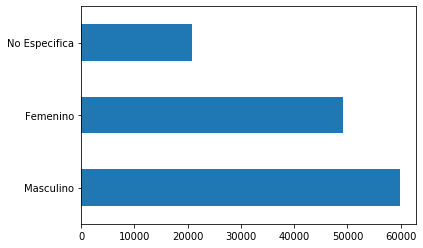

In [502]:
delitoslimpio['Sexo'].value_counts().plot.barh()


# Delitos más comunes

Text(0, 0.5, 'Delito')

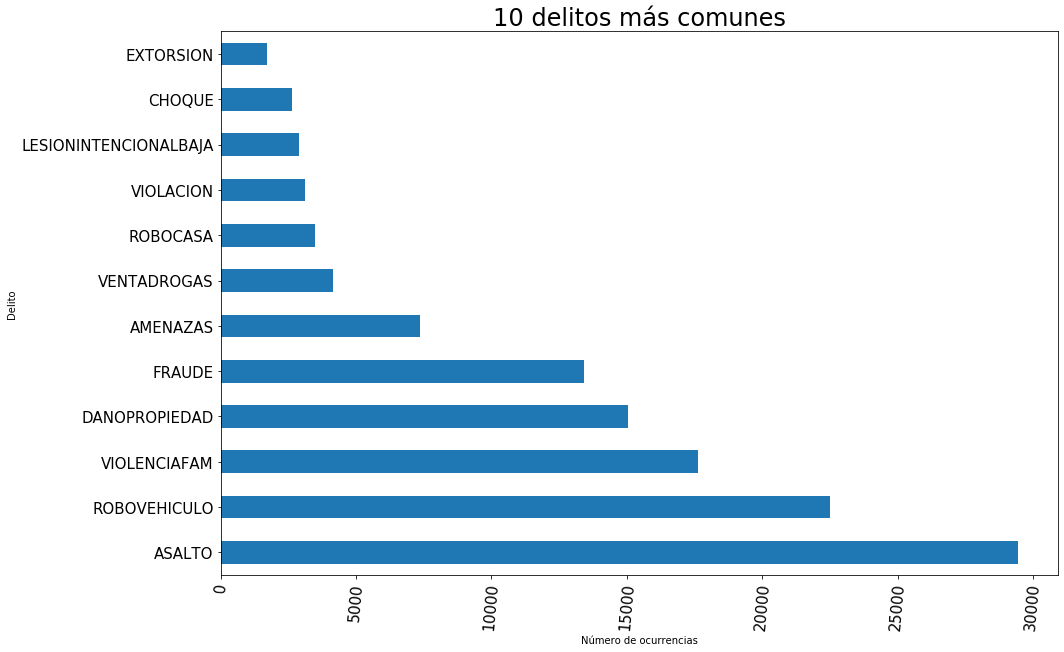

In [503]:
ax = delitoslimpio['Delito'].value_counts().head(12).plot(kind='barh', figsize=(15,10), fontsize=15)
ax.set_title('10 delitos más comunes', size=24, y=1)
plt.xticks(rotation=85)
plt.xlabel('Número de ocurrencias')
plt.ylabel('Delito')


In [504]:
delitoslimpio.Delito.describe()

count     129689
unique        29
top       ASALTO
freq       29438
Name: Delito, dtype: object

# Calidad Juridica más común

Text(0, 0.5, 'Calidad Juridica')

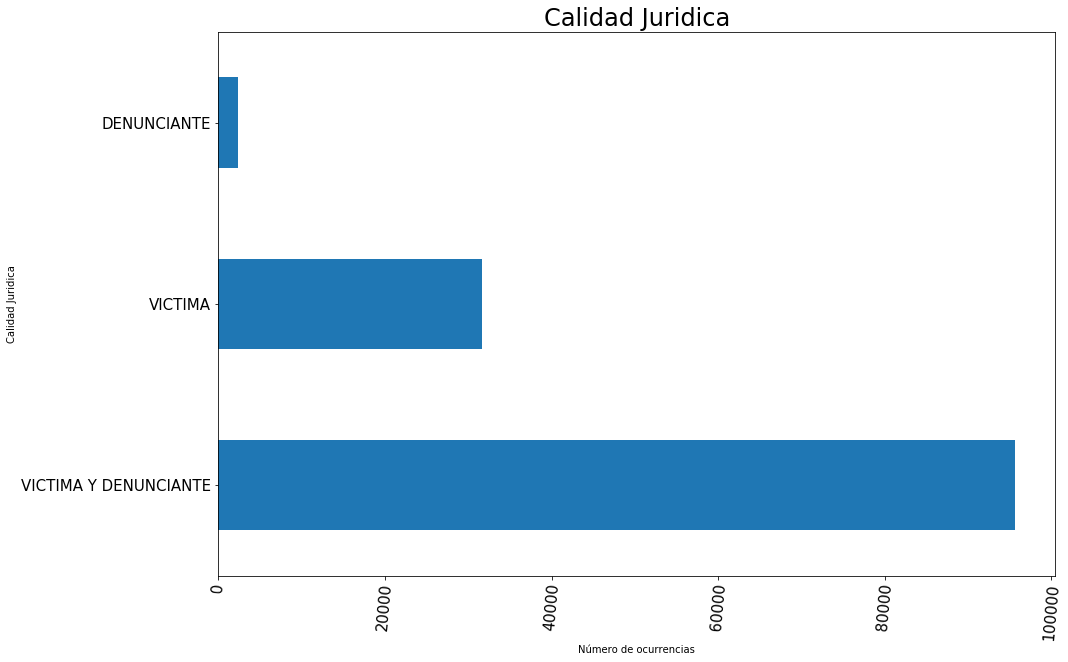

In [505]:
ax = delitoslimpio['CalidadJuridica'].value_counts().head(12).plot(kind='barh', figsize=(15,10), fontsize=15)
ax.set_title('Calidad Juridica', size=24, y=1)
plt.xticks(rotation=85)
plt.xlabel('Número de ocurrencias')
plt.ylabel('Calidad Juridica')


In [506]:
delitoslimpio.dtypes

Delito             object
Categoria          object
FechaHecho         object
Anohecho           object
Mes_hecho          object
Sexo               object
Edad               object
TipoPersona        object
CalidadJuridica    object
lon                object
lat                object
dtype: object

In [507]:
delitoslimpio.Edad.describe()


count     129689
unique       105
top           30
freq       38551
Name: Edad, dtype: int64

# Edad más comun

Text(0, 0.5, 'Número de ocurrencias')

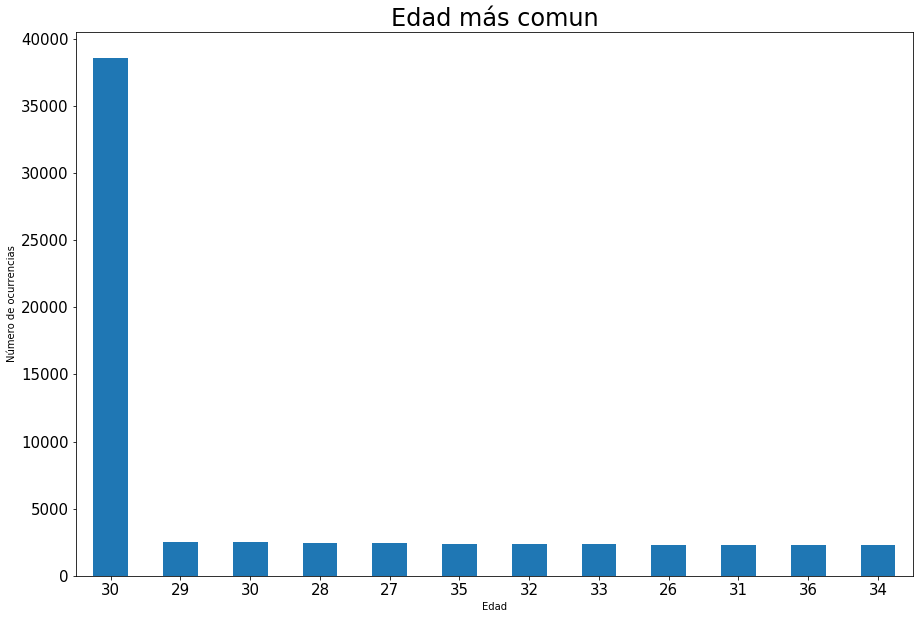

In [508]:
ax = delitoslimpio['Edad'].value_counts().head(12).plot(kind='bar', figsize=(15,10), fontsize=15)
ax.set_title('Edad más comun', size=24, y=1)
plt.xticks(rotation=0)
plt.xlabel('Edad')
plt.ylabel('Número de ocurrencias')

In [509]:
delitoslimpio['Anohecho'] = delitoslimpio.Anohecho.fillna(2015)
delitoslimpio['Anohecho'].astype(str).astype(int)


0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
145862    2019
145865    2019
145867    2019
145868    2019
145869    2019
Name: Anohecho, Length: 129689, dtype: int64

In [536]:

labelEncoder = LabelEncoder()
labelEncoder.fit(delitoslimpio['Delito'])
delitoslimpio['Delito'] = labelEncoder.transform(delitoslimpio['Delito'])
labelEncoder.fit(delitoslimpio['Categoria'])
delitoslimpio['Categoria'] = labelEncoder.transform(delitoslimpio['Categoria'])
#labelEncoder.fit(delitoslimpio['Anohecho'])
#delitoslimpio['Anohecho'] = labelEncoder.transform(delitoslimpio['Anohecho'])
#labelEncoder.fit(delitoslimpio['Mes_hecho'])
#delitoslimpio['Mes_hecho'] = labelEncoder.transform(delitoslimpio['Mes_hecho'])
#labelEncoder.fit(delitoslimpio['FechaHecho'])
#delitoslimpio['FechaHecho'] = labelEncoder.transform(delitoslimpio['FechaHecho'])
labelEncoder.fit(delitoslimpio['Sexo'])
delitoslimpio['Sexo'] = labelEncoder.transform(delitoslimpio['Sexo'])
#abelEncoder.fit(delitoslimpio['Edad'])
#delitoslimpio['Edad'] = labelEncoder.transform(delitoslimpio['Edad'])
labelEncoder.fit(delitoslimpio['TipoPersona'])
delitoslimpio['TipoPersona'] = labelEncoder.transform(delitoslimpio['TipoPersona'])
labelEncoder.fit(delitoslimpio['CalidadJuridica'])
delitoslimpio['CalidadJuridica'] = labelEncoder.transform(delitoslimpio['CalidadJuridica'])
#labelEncoder.fit(delitoslimpio['lon'])
#delitoslimpio['lon'] = labelEncoder.transform(delitoslimpio['lon'])
#labelEncoder.fit(delitoslimpio['lat'])
#delitoslimpio['lat'] = labelEncoder.transform(delitoslimpio['lat'])

#separando los conjuntos de los data en training y testing 
y = delitoslimpio.CalidadJuridica    #lat 
x = delitoslimpio.drop("Categoria",axis=1) #lon

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#obteniendo el arreglos de los features que se utilizaran dentro del k-means
X = np.array(x_train[["Delito","Sexo"]])

#Delito	Categoria	FechaHecho	Sexo	Edad	TipoPersona	CalidadJuridica	lon	lat

#delitoslimpio.Sexo.unique()


# Pruebas Variables Dummies

In [537]:
#delitoslimpio.describe
#delitoslimpio= pd.get_dummies(delitoslimpio, columns=['Sexo'])
#pd.get_dummies(delitoslimpio, columns=['Delito'])
#pd.get_dummies(delitoslimpio, columns=['Categoria'])
#pd.get_dummies(delitoslimpio, columns=['Anohecho'])
#pd.get_dummies(delitoslimpio, columns=['Mes_hecho'])
#delitoslimpio= pd.get_dummies(delitoslimpio, columns=['Sexo'])
#list(delitoslimpio.columns)



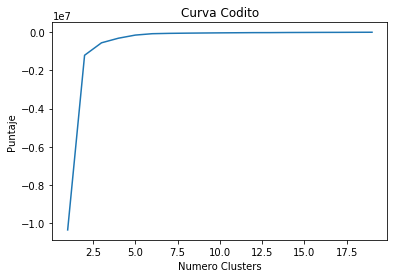

In [538]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Numero Clusters')
plt.ylabel('Puntaje')
plt.title('Curva Codito')
plt.show()


In [539]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 9.04891878  1.01790951]
 [22.0491293   0.82369396]
 [ 2.84837843  0.72921884]
 [27.53551122  0.5125187 ]]


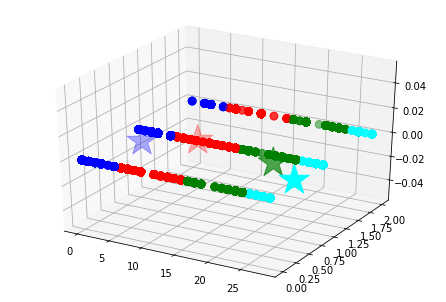

In [540]:

# prediciendo los cluster
labels = kmeans.predict(X)
# obteniendo los centros de los clusters
C = kmeans.cluster_centers_

#sección de código para generar gráfica 3d de los clusters
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)


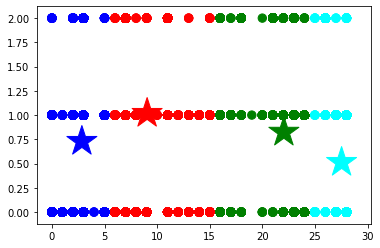

In [541]:

# obteniendo valores y graficando de una manera bidimensional
f1 = x_train['Delito'].values
f2 = x_train['Sexo'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()
